### This script demonstrates how dithering can be applied to low-amplitude signals that are vulnerable to quantization error. After defining the constants, you may click the "Run All" button to run all cells in this script

In [661]:
import matplotlib.pyplot as plt
import librosa
import numpy as np
from IPython.display import Audio

In [662]:
# Define some constants. 
source = 'tone'             # Either 'tone' or 'music'
sr = 16000                  # Sampling rate of the target signal
duration = 5                # Duration of the target signal

In [663]:
# Function for plotting one frame of unquantized waveform, one frame of quantized waveform, and their spectrograms
def plot_figure(x, xq, sr=16000, frm_len=512, hop_len=256):
    '''
    x: waveform
    xq: quantized waveform
    '''
    e = xq - x
    X = librosa.amplitude_to_db(np.abs(librosa.stft(x, n_fft=512, hop_length=256)), ref=np.max)  # STFT of y
    Xq = librosa.amplitude_to_db(np.abs(librosa.stft(xq, n_fft=512, hop_length=256)), ref=np.max)  # STFT of y
    E = librosa.amplitude_to_db(np.abs(librosa.stft(e, n_fft=512, hop_length=256)), ref=np.max)  # STFT of y

    _, ax = plt.subplots(nrows=3, sharex=True, figsize=(8,3))
    librosa.display.waveshow(x[0:frm_len], sr=sr, ax=ax[0])
    librosa.display.waveshow(xq[0:frm_len], sr=sr, ax=ax[1])
    librosa.display.waveshow(e[0:frm_len], sr=sr, ax=ax[2])
    _, ax = plt.subplots(nrows=3, sharex=True, figsize=(8,3))
    librosa.display.specshow(X, sr=sr, n_fft=frm_len, hop_length=hop_len, x_axis='time', y_axis='linear', ax=ax[0])
    librosa.display.specshow(Xq, sr=sr, n_fft=frm_len, hop_length=hop_len, x_axis='time', y_axis='linear', ax=ax[1])
    librosa.display.specshow(E, sr=sr, n_fft=frm_len, hop_length=hop_len, x_axis='time', y_axis='linear', ax=ax[2])

In [664]:
# Function for performing quanitzation
def quantize(y, n_bits=8, xmax=1):
    Q = 2 * xmax/(2**n_bits)
    yq = y/2 * (2**(n_bits-1) + 2**(n_bits-1) - 1)
    yq = np.floor(yq).astype(int).astype(float)*Q
    #print(f"{n_bits}-bit audio ranges from -{2**(n_bits - 1)} to {2**(n_bits - 1) - 1}")
    #print(f"Max value: {np.max(yq)} Avg value: {np.mean(yq):.2f}")
    return yq

In [ ]:
if source == 'music':
    # Load a wavefile and crop a 2-second segment from it
    x, fs = librosa.load('../AudioFiles/Bach.mp3', mono=True, offset=0.0, duration=duration)
    x = librosa.resample(x, orig_sr=fs, target_sr=sr)
    n_bits = 8                  # Number of bits per sample in the target signal
    amp_reduction_ratio= 4     # Reduce the amplitude of the signal by this factor
    noise_var_ratio = 20
else:
    # Generate a tone of 500Hz with a sampling rate of 16kHz
    x = librosa.tone(500, sr=sr, length=sr*2)
    n_bits = 8                  # Number of bits per sample in the target signal
    amp_reduction_ratio= 40     # Reduce the amplitude of the signal by this factor
    noise_var_ratio = 10

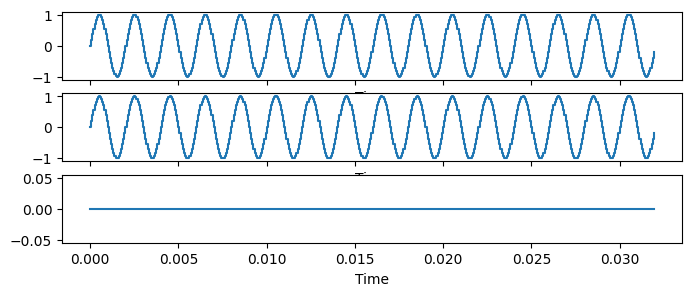

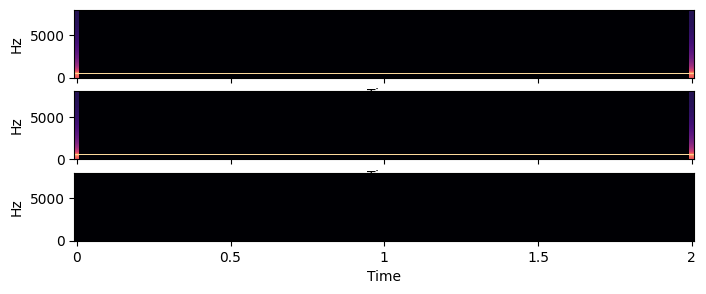

In [666]:
plot_figure(x, x, sr=sr)

In [667]:
# Reduce the amplitude of the signal to make it more vulnerable to quanization error. 
# Reduce the number of bits per sample
y = x/amp_reduction_ratio
yq = quantize(y, n_bits=n_bits, xmax=1)

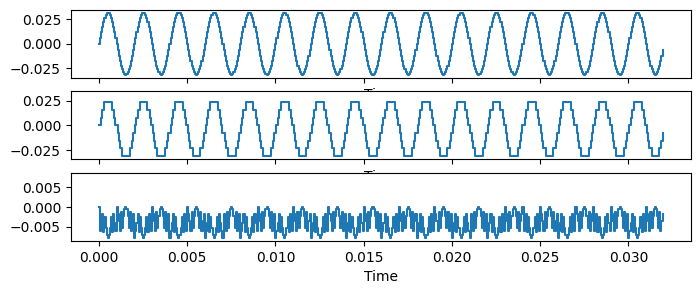

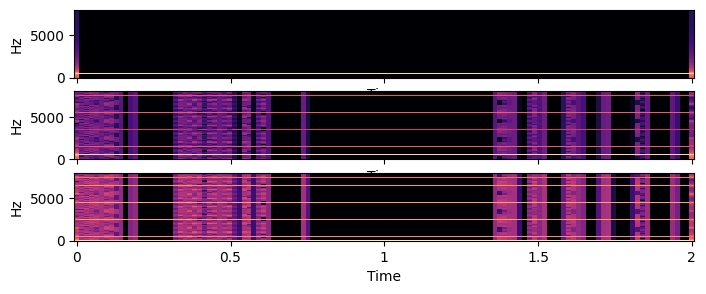

In [668]:
# Plot a short segment of the low-amplitude waveform, quantized waveform, quantization error, and their spectrograms 
plot_figure(y, yq, sr=sr)

In [669]:
# Perform dithering by adding Gaussian noise
noise_var = np.max(np.abs(y))/noise_var_ratio         # Variance of Gaussian noise for dithering
z = y + np.random.normal(0, noise_var, yq.shape[0])
zq = quantize(z, n_bits=n_bits, xmax=1)

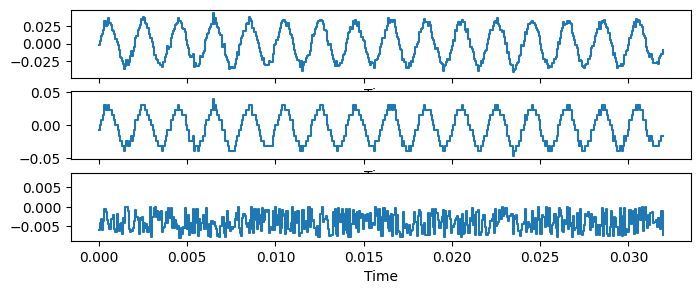

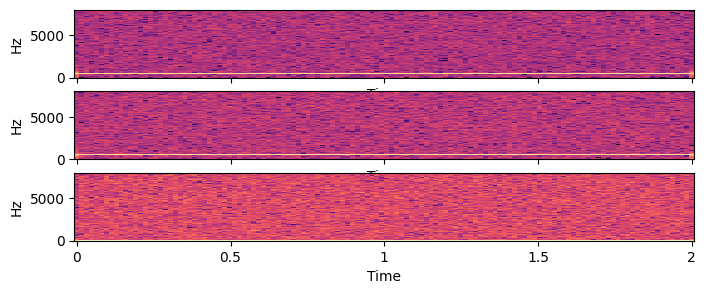

In [670]:
# Plot a frame of dithered signal, the quantization error, and their spectrograms
plot_figure(z, zq, sr=sr)

In [671]:
# Listen to the original waveform
Audio(data=x, rate=sr)

In [672]:
# Listen to the quantized waveform
Audio(data=yq, rate=sr)

In [673]:
# Listen to the dithered waveform
Audio(data=zq, rate=sr)